Gaussian Filter

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Read the image
img = cv2.imread('/content/d.jpg')

In [ ]:
img

array([[[ 89,  89,  89],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 60,  60,  60]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 88,  88,  88],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 60,  60,  60]],

       [[ 90,  90,  90],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 61,  61,  61]],

       ...,

       [[144, 144, 144],
        [144, 144, 144],
        [145, 145, 145],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [102, 102, 102]],

       [[144, 144, 144],
        [144, 144, 144],
        [147, 147, 147],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [102, 102, 102]],

       [[144, 144, 144],
        [145, 145, 145],
        [149, 149, 149],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [102, 102, 102]]

In [ ]:
pi = 3.14
e = 2.718

In [ ]:
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * e**(-((x)**2 + (y)**2)) / (2*(sigma)**2), (size, size)
        )
    return kernel / np.sum(kernel)

In [ ]:
kernel_size = 3
sigma = 1.0

In [ ]:
kernel = gaussian_kernel(kernel_size, sigma)

In [ ]:
kernel

array([[5.20382438e-01, 1.91457851e-01, 9.53509056e-03],
       [1.91457851e-01, 7.04407104e-02, 3.50812751e-03],
       [9.53509056e-03, 3.50812751e-03, 1.74713721e-04]])

In [ ]:
m, n, _ = img.shape

In [ ]:
img_out = np.zeros_like(img)

In [ ]:
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = (
            img[i-1, j-1]*kernel[0, 0] + img[i-1, j]*kernel[0, 1] + img[i-1, j + 1]*kernel[0, 2] +
            img[i, j-1]*kernel[1, 0] + img[i, j]*kernel[1, 1] + img[i, j + 1]*kernel[1, 2] +
            img[i + 1, j-1]*kernel[2, 0] + img[i + 1, j]*kernel[2, 1] + img[i + 1, j + 1]*kernel[2, 2]
        )

        img_out[i, j] = temp

In [ ]:
img_out

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 61,  61,  61],
        [ 60,  60,  60],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [ 89,  89,  89],
        [ 88,  88,  88],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [144, 144, 144],
        [144, 144, 144],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [144, 144, 144],
        [144, 144, 144],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

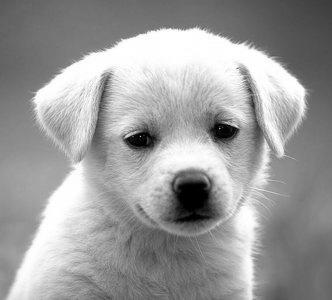

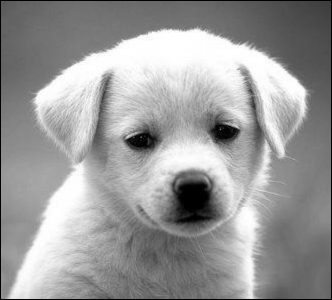

In [ ]:
cv2_imshow(img)
cv2_imshow(img_out)

Laplace Filter

In [ ]:
kernel = np.array([[0, 1, 0],
                 [1, -4, 1],
                 [0, 1, 0]])

In [ ]:
img_lap = np.zeros_like(img)

In [ ]:
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = (
            img[i-1, j-1]*kernel[0, 0] + img[i-1, j]*kernel[0, 1] + img[i-1, j + 1]*kernel[0, 2] +
            img[i, j-1]*kernel[1, 0] + img[i, j]*kernel[1, 1] + img[i, j + 1]*kernel[1, 2] +
            img[i + 1, j-1]*kernel[2, 0] + img[i + 1, j]*kernel[2, 1] + img[i + 1, j + 1]*kernel[2, 2]
        )

        img_lap[i, j] = temp

In [ ]:
img_lap

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [254, 254, 254],
        [  2,   2,   2],
        ...,
        [  0,   0,   0],
        [255, 255, 255],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  2,   2,   2],
        [  0,   0,   0],
        ...,
        [  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  1,   1,   1],
        [  3,   3,   3],
        ...,
        [  0,   0,   0],
        [255, 255, 255],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  4,   4,   4],
        [  3,   3,   3],
        ...,
        [  0,   0,   0],
        [255, 255, 255],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

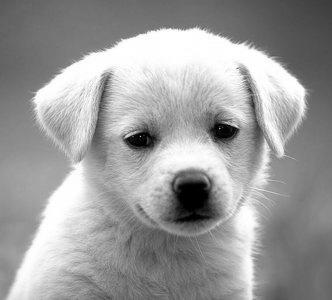

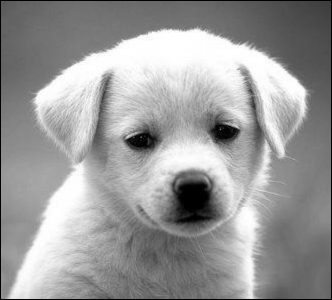

In [ ]:
cv2_imshow(img)
cv2_imshow(img_out)

### Predefined Function

Gaussian filter

In [ ]:
from scipy.ndimage import gaussian_filter
output_image = gaussian_filter(img, sigma=1.0)

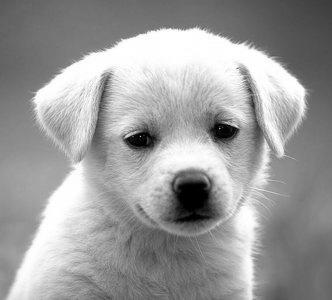

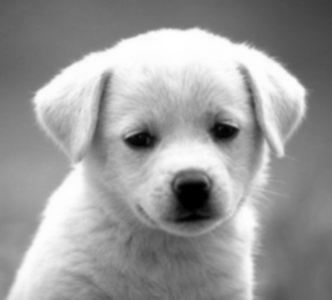

In [ ]:
cv2_imshow(img)
cv2_imshow(output_image)